<a href="https://colab.research.google.com/github/btcnhung1299/tf-practice/blob/master/TS_ClimateForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Gathering

In [1]:
!wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip
!unzip -q jena_climate_2009_2016.csv.zip

--2020-09-27 23:42:13--  https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.128, 74.125.124.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  38.7MB/s    in 0.3s    

2020-09-27 23:42:13 (38.7 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13568290/13568290]



In [48]:
import datetime

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [53]:
df = pd.read_csv("./jena_climate_2009_2016.csv")
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


## Data Preprocessing

Convert time to timestamp.

In [54]:
df["Date Time"] = df["Date Time"].map(pd.to_datetime).map(datetime.datetime.timestamp)

It's easier to spot an outlier by plotting.
There's an abnormaly in `wv (m/s)` and `max. wv (m/s)` in which the value is significantly lower than usual.

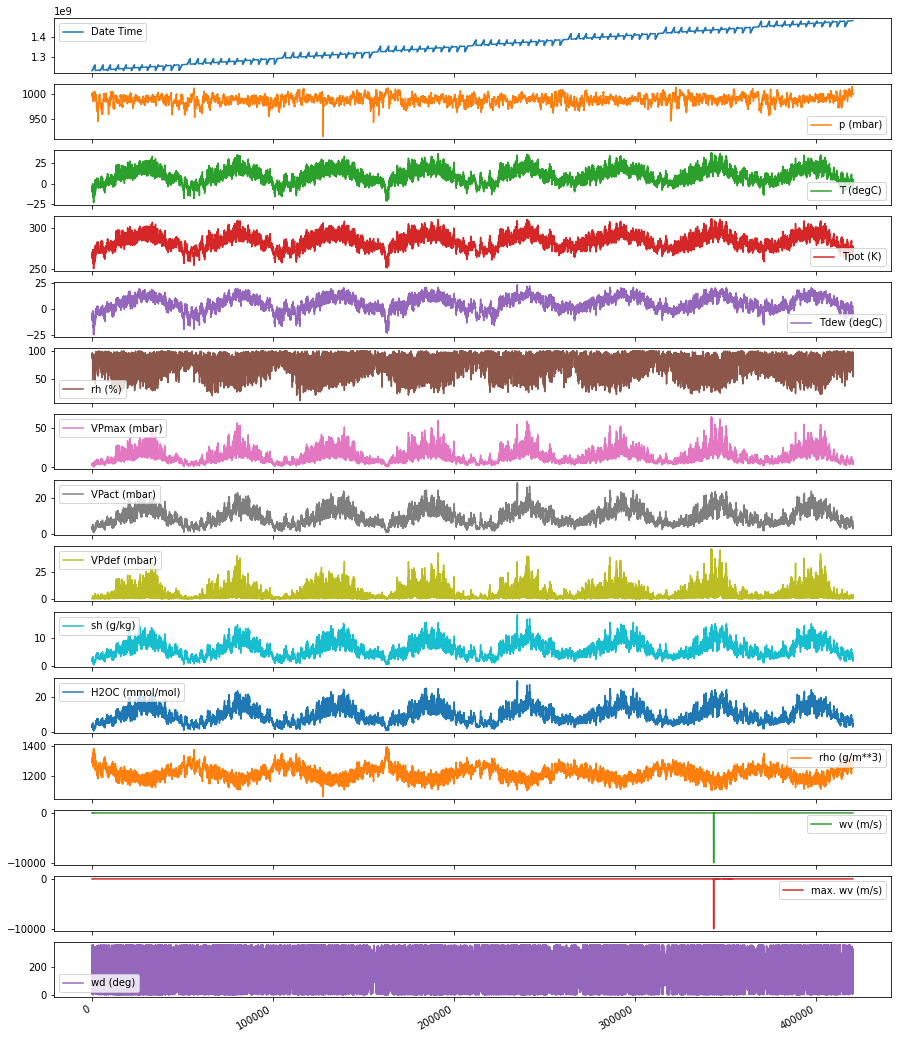

In [55]:
df.plot(subplots=True, figsize=(15, 20));

Looking more closely at data description of `mv (m/s)` and `max. wv (m/s)`, it can be seen that most of the values are positive. It makes sense since `wv (m/s)` specifies the wind velocity and should not be negative.

In [60]:
df[["wv (m/s)", "max. wv (m/s)"]].describe()

,wv (m/s),max. wv (m/s)
count,420551.000000,420551.000000
mean,2.130191,3.532074
std,1.542334,2.340482
min,0.000000,0.000000
25%,0.990000,1.760000
50%,1.760000,2.960000
75%,2.860000,4.740000
max,28.490000,23.500000


Consequently, we change the values to `0` if they were previously filled in by negative values.

In [57]:
df["wv (m/s)"] = df["wv (m/s)"].apply(lambda x : max(0, x))
df["max. wv (m/s)"] = df["max. wv (m/s)"].apply(lambda x : max(0, x))

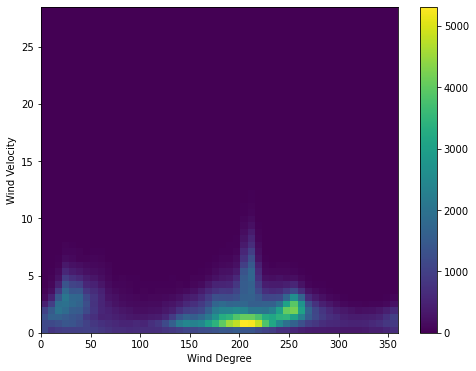

In [58]:
fig = plt.figure(figsize=(8, 6))
plt.hist2d(x=df["wd (deg)"], y=df["wv (m/s)"], bins=50);
plt.colorbar();
plt.xlabel("Wind Degree");
plt.ylabel("Wind Velocity");

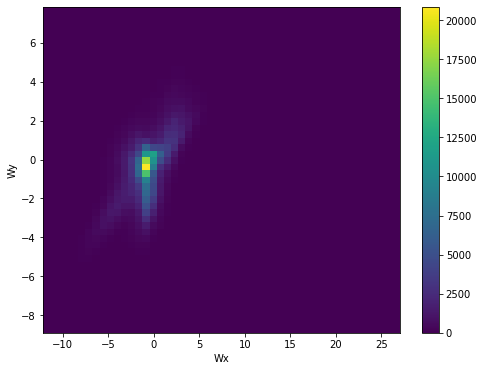

In [59]:
df["Wx"] = df["wv (m/s)"] * np.cos(df["wd (deg)"] * np.pi / 180.0)
df["Wy"] = df["wv (m/s)"] * np.sin(df["wd (deg)"] * np.pi / 180.0)

fig = plt.figure(figsize=(8, 6))
plt.hist2d(x=df["Wx"], y=df["Wy"], bins=50);
plt.colorbar();
plt.xlabel("Wx");
plt.ylabel("Wy");